Author : Mohamed Elafifi

Student ID : 22066939

In [10]:
import csv
import pandas as pd
full_data = pd.read_csv('cities.csv')
full_data

,City,X,Y
0,City_1,37.454012,95.071431
1,City_2,73.199394,59.865848
2,City_3,15.601864,15.599452
3,City_4,5.808361,86.617615
4,City_5,60.111501,70.807258
5,City_6,2.058449,96.990985
6,City_7,83.244264,21.233911
7,City_8,18.182497,18.340451
8,City_9,30.424224,52.475643
9,City_10,43.194502,29.122914


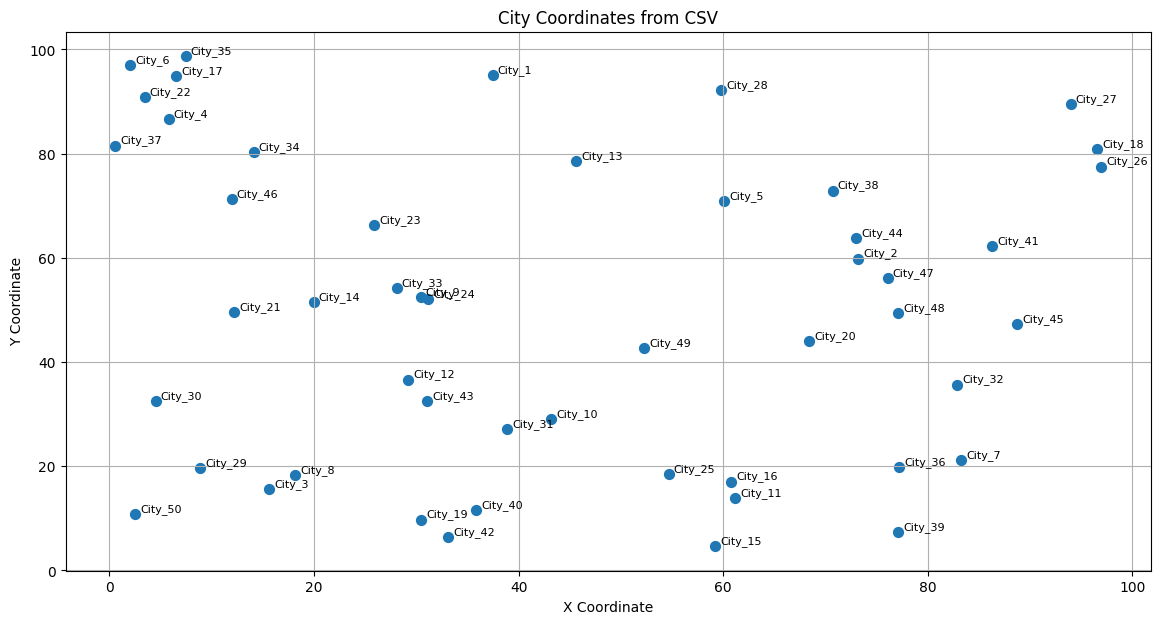

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,7))

plt.scatter(full_data["X"], full_data["Y"], s=50)

for i, row in full_data.iterrows():
    plt.text(row["X"] + 0.5, row["Y"] + 0.5, row["City"], fontsize = 8)

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("City Coordinates from CSV")
plt.grid(True)
plt.show()

SIMULATED ANNEALING - TSP RESULTS

Starting City (auto-chosen best): City_20
Number of cities visited: 50
Final Distance: 597.06
Execution Time: 0.8664 seconds

ALGORITHM METRICS
Initial Best Distance: 597.06
Final Best Distance: 597.06
Total Improvement: 0.00%
Number of Improvements: 194
Acceptances: 355
Rejections: 645
Acceptance Rate: 35.50%
Total Evaluations: 1000
Initial Temperature: 1000
Final Temperature: 0.043607
Cooling Rate: 0.99

TIME COMPLEXITY ANALYSIS
Max Iterations (I): 1000
Number of Cities (N): 50

Theoretical Complexity: O(I × N²)
Estimated Operations: 1000 × 50² = 2,500,000
Actual Time per Iteration: 0.866421 ms
Actual Time per Evaluation: 0.866421 ms

ROUTE DETAILS
Route: City_20 → City_48 → City_47 → City_2 → City_44 → City_38 → City_5 → City_13 → City_1 → City_28 → City_27 → City_18 → City_26 → City_41 → City_45 → City_32 → City_7 → City_36 → City_39 → City_11 → City_16 → City_25 → City_15 → City_40 → City_19 → City_42 → City_8 → City_3 → City_29 → City_50 → City_

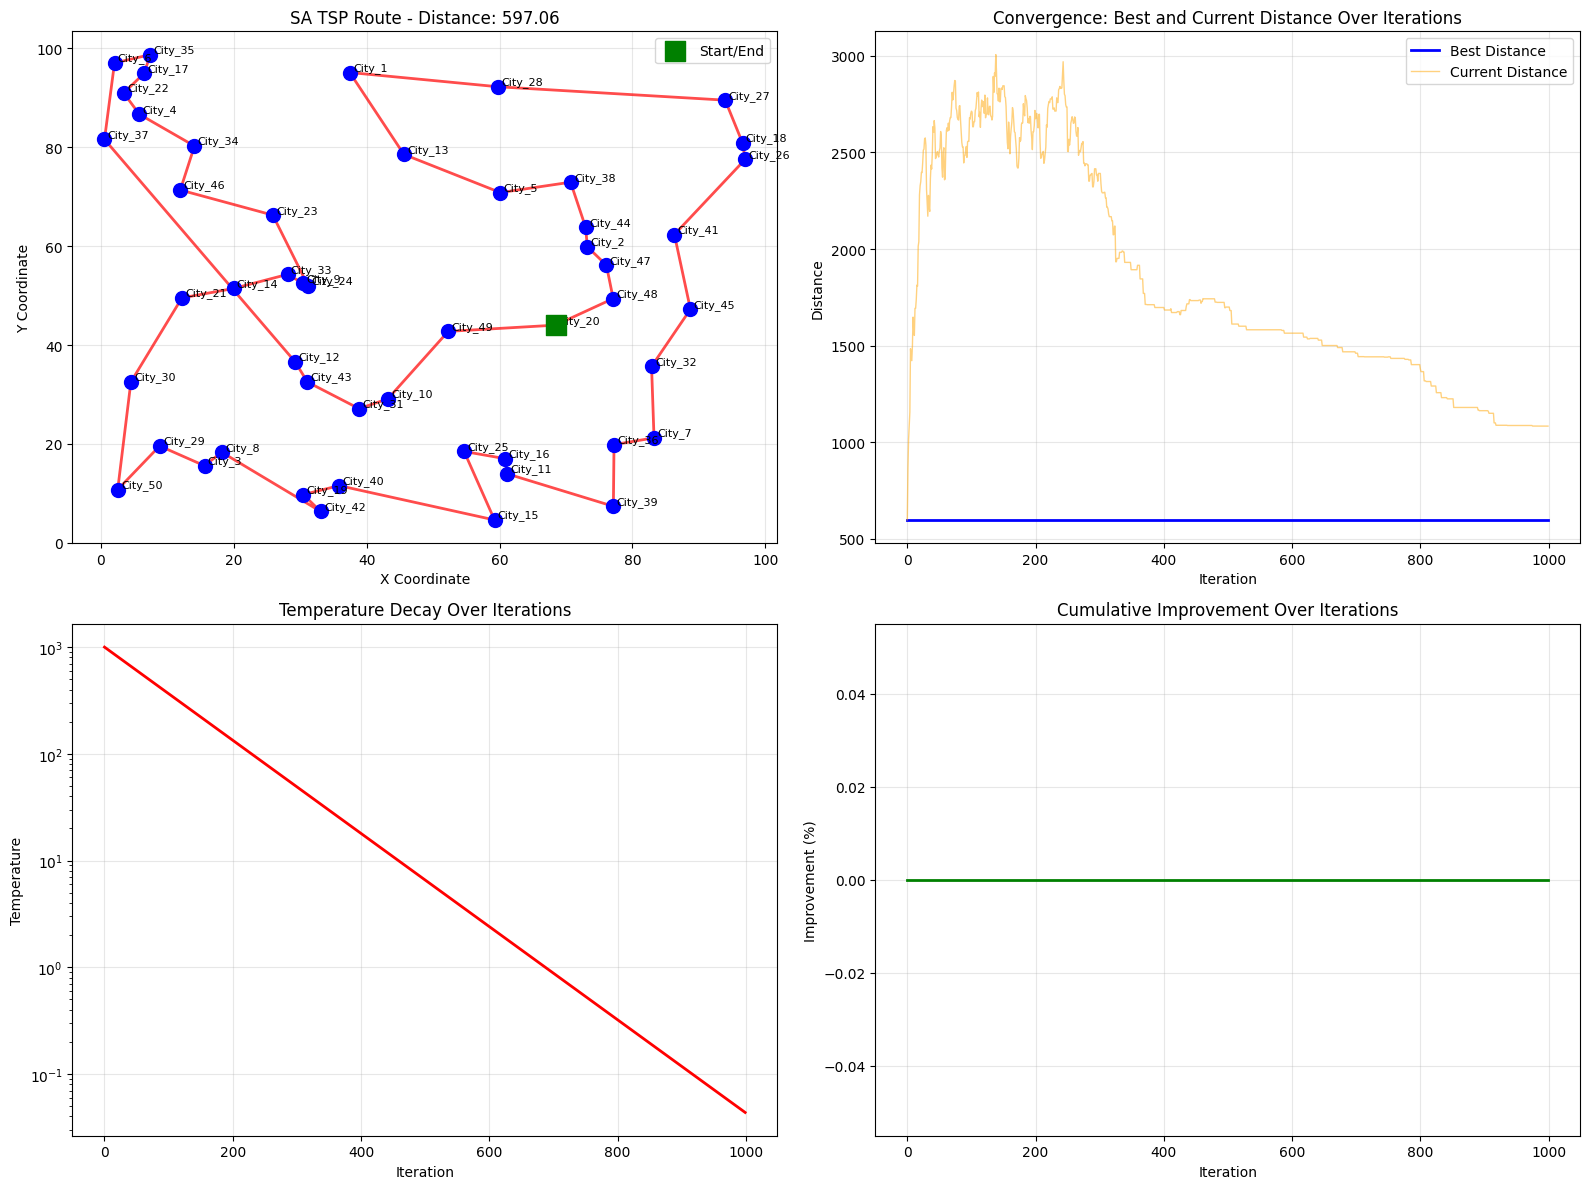

In [12]:
import random
import math
import numpy as np
import time

def calculate_distance(route):
    """
    Calculate the total Euclidean distance of a route including return to start.
    """
    route_extended = np.append(route, [route[0]], axis=0)
    return np.sum(np.sqrt(np.sum(np.diff(route_extended, axis=0)**2, axis=1)))

def create_initial_route(cities):
    """
    Generate a random initial route.
    """
    route = list(range(len(cities)))
    random.shuffle(route)
    return route

def create_nearest_neighbor_route(cities, start_index=0):
    """
    Create route using greedy nearest neighbor heuristic from given start city.
    """
    n = len(cities)
    unvisited = set(range(n))
    route = [start_index]
    unvisited.remove(start_index)

    while unvisited:
        last = route[-1]
        next_city = min(
            unvisited,
            key=lambda j: np.linalg.norm(cities[last] - cities[j])
        )
        route.append(next_city)
        unvisited.remove(next_city)

    return route

def get_neighbors(route):
    """
    Generate all neighbor solutions by swapping two cities.
    """
    neighbors = []
    for i in range(len(route)):
        for j in range(i + 1, len(route)):
            neighbor = route.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

def best_nearest_neighbor_route(cities):
    """
    Find best starting city by trying nearest neighbor from all cities.
    """
    n = len(cities)
    best_distance = math.inf
    best_route = None
    best_start = None

    for start_index in range(n):
        route = create_nearest_neighbor_route(cities, start_index=start_index)
        distance = calculate_distance(cities[route])

        if distance < best_distance:
            best_distance = distance
            best_route = route
            best_start = start_index

    return best_start, best_route, best_distance

def simulated_annealing(cities, initial_temp, cooling_rate, max_iterations, start_index=None):
    """
    Solve TSP using simulated annealing algorithm.
    Returns route, distance, start_index, and metrics dictionary.
    """
    # Metrics tracking
    metrics = {
        'best_distances': [],
        'current_distances': [],
        'temperatures': [],
        'acceptances': 0,
        'rejections': 0,
        'improvements': 0,
        'total_evaluations': 0
    }
    
    if start_index is None:
        start_index, current_route, current_distance = best_nearest_neighbor_route(cities)
    else:
        current_route = create_nearest_neighbor_route(cities, start_index=start_index)
        current_distance = calculate_distance(cities[current_route])

    best_route = current_route.copy()
    best_distance = current_distance
    temperature = initial_temp

    for iteration in range(max_iterations):
        # Generate neighbors
        neighbors = get_neighbors(current_route)
        next_route = random.choice(neighbors)
        next_distance = calculate_distance(cities[next_route])
        
        metrics['total_evaluations'] += 1
        
        # Track metrics
        metrics['best_distances'].append(best_distance)
        metrics['current_distances'].append(current_distance)
        metrics['temperatures'].append(temperature)
        
        # Acceptance criterion
        if next_distance < current_distance:
            current_route, current_distance = next_route, next_distance
            metrics['acceptances'] += 1
            metrics['improvements'] += 1
            
            if current_distance < best_distance:
                best_route, best_distance = current_route, current_distance
        elif random.random() < np.exp((current_distance - next_distance) / temperature):
            current_route, current_distance = next_route, next_distance
            metrics['acceptances'] += 1
        else:
            metrics['rejections'] += 1

        temperature *= cooling_rate

    # Final metrics
    metrics['final_improvement'] = ((metrics['best_distances'][0] - best_distance) / metrics['best_distances'][0]) * 100
    metrics['acceptance_rate'] = (metrics['acceptances'] / max_iterations) * 100
    
    return best_route, best_distance, start_index, metrics


# Parameters
initial_temp = 1000
cooling_rate = 0.99
max_iterations = 1000
random.seed(42)

# Select subset of cities
start_city_idx = 0
end_city_idx = 49
num_cities_to_visit = 50

# Get indices for the city range
city_indices = list(range(start_city_idx, end_city_idx + 1))

# Randomly select cities if more available than needed
if len(city_indices) > num_cities_to_visit:
    middle_cities = city_indices[1:-1]
    random.shuffle(middle_cities)
    selected_middle = middle_cities[:num_cities_to_visit - 2]
    city_indices = [city_indices[0]] + selected_middle + [city_indices[-1]]
else:
    city_indices = city_indices[:num_cities_to_visit]

# Get subset of data
subset_data = full_data.iloc[city_indices].reset_index(drop=True)
cities = subset_data[["X", "Y"]].values

# Run algorithm with timing
start_time = time.time()
sa_route, sa_distance, chosen_start_index, metrics = simulated_annealing(
    cities, initial_temp, cooling_rate, max_iterations, start_index=None
)
end_time = time.time()
execution_time = end_time - start_time

# Map back to original city names
original_route = [city_indices[i] for i in sa_route]

start_city = subset_data.iloc[sa_route[0]]['City']

# Print comprehensive metrics
print("=" * 60)
print("SIMULATED ANNEALING - TSP RESULTS")
print("=" * 60)
print(f"\nStarting City (auto-chosen best): {start_city}")
print(f"Number of cities visited: {len(sa_route)}")
print(f"Final Distance: {sa_distance:.2f}")
print(f"Execution Time: {execution_time:.4f} seconds")

print("\n" + "=" * 60)
print("ALGORITHM METRICS")
print("=" * 60)
print(f"Initial Best Distance: {metrics['best_distances'][0]:.2f}")
print(f"Final Best Distance: {sa_distance:.2f}")
print(f"Total Improvement: {metrics['final_improvement']:.2f}%")
print(f"Number of Improvements: {metrics['improvements']}")
print(f"Acceptances: {metrics['acceptances']}")
print(f"Rejections: {metrics['rejections']}")
print(f"Acceptance Rate: {metrics['acceptance_rate']:.2f}%")
print(f"Total Evaluations: {metrics['total_evaluations']}")
print(f"Initial Temperature: {initial_temp}")
print(f"Final Temperature: {metrics['temperatures'][-1]:.6f}")
print(f"Cooling Rate: {cooling_rate}")

print("\n" + "=" * 60)
print("TIME COMPLEXITY ANALYSIS")
print("=" * 60)
print(f"Max Iterations (I): {max_iterations}")
print(f"Number of Cities (N): {len(sa_route)}")
print(f"\nTheoretical Complexity: O(I × N²)")
print(f"Estimated Operations: {max_iterations} × {len(sa_route)}² = {max_iterations * len(sa_route)**2:,}")
print(f"Actual Time per Iteration: {(execution_time / max_iterations) * 1000:.6f} ms")
print(f"Actual Time per Evaluation: {(execution_time / metrics['total_evaluations']) * 1000:.6f} ms")

print("\n" + "=" * 60)
print("ROUTE DETAILS")
print("=" * 60)
route_names = [subset_data.iloc[i]['City'] for i in sa_route]
print(f"Route: {' → '.join(route_names)} → {route_names[0]}")

# Visualization with metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Route visualization
ax1 = axes[0, 0]
ax1.scatter(subset_data["X"], subset_data["Y"], s=100, c='blue', zorder=3)
for i, row in subset_data.iterrows():
    ax1.text(row["X"] + 0.5, row["Y"] + 0.5, row["City"], fontsize=8)
route_coords = cities[sa_route]
route_coords = np.append(route_coords, [route_coords[0]], axis=0)
ax1.plot(route_coords[:, 0], route_coords[:, 1], 'r-', linewidth=2, alpha=0.7, zorder=2)
start_coords = cities[sa_route[0]]
ax1.scatter(start_coords[0], start_coords[1], s=200, c='green', marker='s', zorder=4, label='Start/End')
ax1.set_xlabel("X Coordinate")
ax1.set_ylabel("Y Coordinate")
ax1.set_title(f"SA TSP Route - Distance: {sa_distance:.2f}")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Best distance over iterations
ax2 = axes[0, 1]
ax2.plot(metrics['best_distances'], 'b-', linewidth=2, label='Best Distance')
ax2.plot(metrics['current_distances'], 'orange', linewidth=1, alpha=0.5, label='Current Distance')
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Distance")
ax2.set_title("Convergence: Best and Current Distance Over Iterations")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Temperature decay
ax3 = axes[1, 0]
ax3.plot(metrics['temperatures'], 'r-', linewidth=2)
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Temperature")
ax3.set_title("Temperature Decay Over Iterations")
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3)

# Plot 4: Improvement over iterations
ax4 = axes[1, 1]
improvement_percentage = []
for i in range(len(metrics['best_distances'])):
    imp = ((metrics['best_distances'][0] - metrics['best_distances'][i]) / metrics['best_distances'][0]) * 100
    improvement_percentage.append(imp)
ax4.plot(improvement_percentage, 'green', linewidth=2)
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Improvement (%)")
ax4.set_title("Cumulative Improvement Over Iterations")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()